In [58]:
import keras 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [59]:
def generate_series(batch_size, n_steps):
    if n_steps==1:
        random = np.random.RandomState(seed=43)
    else: 
        random = np.random
    freq1, freq2, offset1, offset2 = random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time- offset1) * (freq1 * 10+10))
    series += 0.2 * np.sin((time- offset2) * (freq1 * 20+20))
    series += 0.1 * (random.rand(batch_size, n_steps)- 0.5)
    
    return series[..., np.newaxis].astype(np.float32)

In [60]:
import numpy as np

class RNN:

    
    def __init__(self, random_state=1):
        self.random_state = random_state 

    def fit(self, x, epochs=100, learning_rate=0.01):
        self.x_ = x
        self.y_ = np.zeros(shape=x.shape)
        random_x = np.random.RandomState(seed=self.random_state)
        random_y = np.random.RandomState(seed=self.random_state+1)
        
        self.wx = random_x.normal(loc=0.0, scale=1.0, size=x.shape[1]) 
        self.wy = random_y.normal(loc=0.0, scale=1.0, size=x.shape[1]) 
        self.bias_ = np.float32(0.)

        for epoch in range(epochs):
            for t in range(x.shape[0]):
                # Forward pass
                y_prev = self.y_[t-1] if t > 0 else np.zeros_like(self.wx)
                y_current = self.relu(np.dot(x[t], self.wx) + np.dot(y_prev, self.wy) + self.bias_)
                self.y_[t] = y_current

                # Backward pass (simplified, assuming mean squared error and gradient descent)
                error = self.y_[t] - x[t]
                dL_dy = 2 * error  # Derivative of loss with respect to y

                dL_dwx = dL_dy * x[t]
                dL_dwy = dL_dy * y_prev
                dL_db = dL_dy

                self.wx -= learning_rate * dL_dwx
                self.wy -= learning_rate * dL_dwy
                self.bias_ -= learning_rate * dL_db

    def relu(self, z):
        return np.where(z < 0, 0, z)

    def predict(self, x):
        y = np.zeros(shape=x.shape)
        for t in range(x.shape[0]):
            y_prev = y[t-1] if t > 0 else np.zeros_like(self.wx)
            y[t] = self.relu(np.dot(x[t], self.wx) + np.dot(y_prev, self.wy) + self.bias_)
        return y


In [61]:
series = np.abs(10*generate_series(30, 1)[:,0])

In [62]:
series

array([[4.647394  ],
       [0.34061897],
       [2.431796  ],
       [2.771605  ],
       [1.8228979 ],
       [3.9827867 ],
       [0.9865781 ],
       [1.5113399 ],
       [0.42429328],
       [2.8991318 ],
       [5.64749   ],
       [6.869135  ],
       [1.6189629 ],
       [5.935736  ],
       [2.3110433 ],
       [2.5609686 ],
       [5.3368206 ],
       [3.6496851 ],
       [3.6022806 ],
       [0.7136799 ],
       [2.878506  ],
       [3.2270317 ],
       [5.616252  ],
       [3.9766333 ],
       [1.604123  ],
       [2.7053525 ],
       [3.287085  ],
       [2.8752208 ],
       [0.6474167 ],
       [5.165288  ]], dtype=float32)

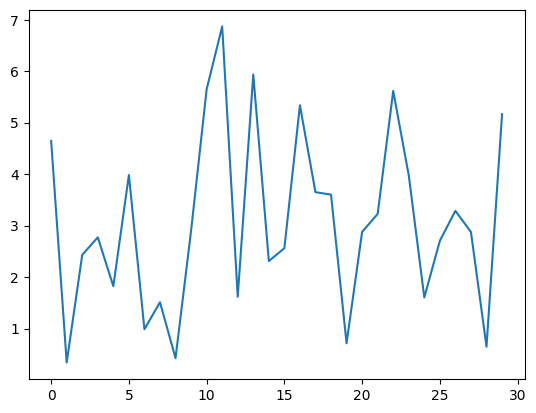

In [63]:
plt.plot(series)

In [64]:
rnn = RNN()
rnn.fit(series, epochs=10)

In [65]:
rnn.predict(series)

array([[4.63449134],
       [0.34238503],
       [2.40713736],
       [2.76876488],
       [1.81705667],
       [3.98256407],
       [0.98655228],
       [1.48654224],
       [0.39686639],
       [2.87815049],
       [5.66856329],
       [6.92485405],
       [1.65103127],
       [5.94715939],
       [2.3385522 ],
       [2.55605479],
       [5.35274669],
       [3.68063319],
       [3.61710054],
       [0.70835251],
       [2.86032972],
       [3.23155764],
       [5.64045477],
       [4.01251361],
       [1.60855913],
       [2.69451473],
       [3.29044982],
       [2.8814322 ],
       [0.63468627],
       [5.16188965]])

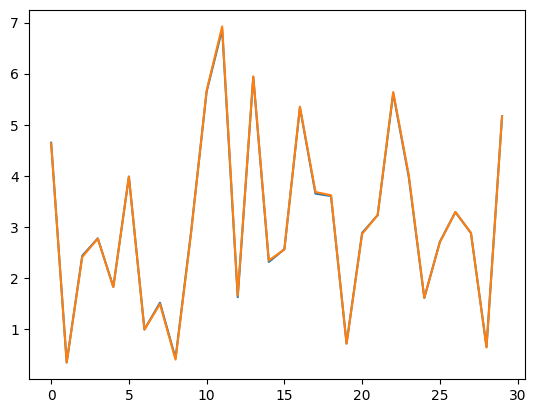

In [66]:
plt.plot(series)
plt.plot(rnn.predict(series))

In [67]:
series = generate_series(20, 2)

In [68]:
series[:,0].T

array([[ 0.50516343, -0.39168462,  0.33510077, -0.21790257,  0.16807838,
         0.5645484 ,  0.10454854, -0.24266171, -0.14618327,  0.41478816,
         0.4575091 , -0.3778128 ,  0.01193204, -0.2596014 , -0.3952837 ,
        -0.64747804, -0.06738295,  0.72079223, -0.2358797 ,  0.72581935]],
      dtype=float32)

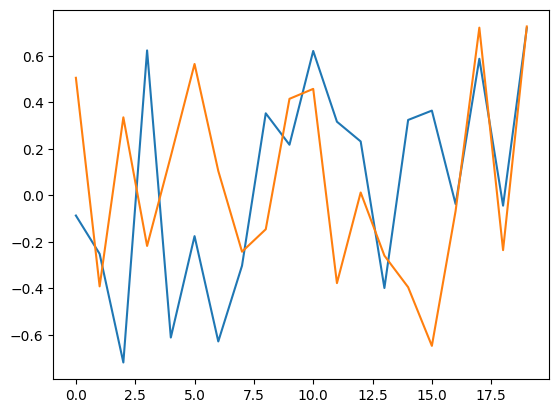

In [69]:
plt.plot(series[:,1])
plt.plot(series[:,0])


In [70]:
n = 50
batch =  2000
series = generate_series(batch, n+1)

In [71]:
series[:1700 , :n].shape, series[:1700, n:].shape, series[:1700, -1].shape

((1700, 50, 1), (1700, 1, 1), (1700, 1))

In [72]:
xtrain, ytrain = series[:1700 , :n], series[:1700, -1]
xtest , ytest  = series[1700:2000 , :n], series[1700:2000, -1]

In [104]:
xtrain.shape, ytrain.shape 

((1700, 50, 1), (1700, 1))

Criando rnn simples

In [73]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss     =keras.losses.mse
)
model.fit(xtrain, ytrain)

54/54 [==============================] - 1s 4ms/step - loss: 0.6084


In [74]:
pred = model.predict(xtest)

10/10 [==============================] - 0s 2ms/step


In [75]:
pred.shape

(300, 1)

In [76]:
np.mean(keras.losses.mean_squared_error(ytest, pred))

0.6096903

rnn profunda

In [77]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.Dense(1),

])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss     =keras.losses.mse
)
model.fit(xtrain, ytrain, epochs=2)

Epoch 1/2
54/54 [==============================] - 3s 22ms/step - loss: 0.2563
Epoch 2/2
54/54 [==============================] - 1s 26ms/step - loss: 0.1480


In [78]:
pred = model.predict(xtest)

10/10 [==============================] - 1s 8ms/step


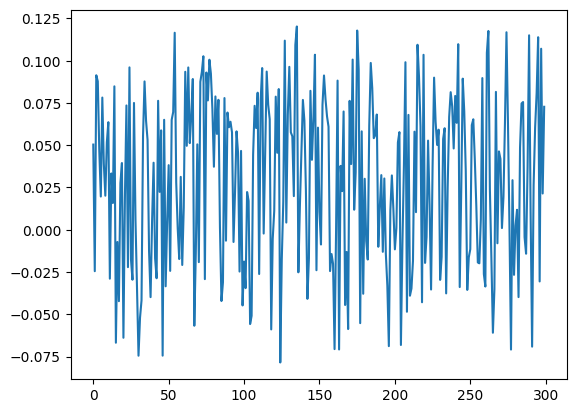

In [86]:
plt.plot(pred[:, 0])

In [ ]:
np.mean(keras.losses.mean_squared_error(ytest, pred[:, -1]))

0.1355177

In [ ]:
series = generate_series(1, 50+10)
x_new, y_new =series[:, :60] , series[:, 60:]

In [ ]:
x_new

array([[[ 0.51316416],
        [ 0.35079643],
        [ 0.05803325],
        [-0.2351649 ],
        [-0.4550099 ],
        [-0.5701954 ],
        [-0.57654405],
        [-0.5189001 ],
        [-0.42719445],
        [-0.2591634 ],
        [-0.12939185],
        [-0.05834319],
        [ 0.0371078 ],
        [ 0.10004686],
        [ 0.14601207],
        [ 0.13466825],
        [ 0.2597158 ],
        [ 0.43484017],
        [ 0.4778635 ],
        [ 0.5508754 ],
        [ 0.5534086 ],
        [ 0.38809884],
        [ 0.1642051 ],
        [-0.05010388],
        [-0.28742462],
        [-0.5120828 ],
        [-0.62385136],
        [-0.58998543],
        [-0.5487207 ],
        [-0.3180955 ],
        [-0.1716328 ],
        [-0.12325138],
        [-0.01881638],
        [-0.00519519],
        [ 0.09649983],
        [ 0.16908394],
        [ 0.17041695],
        [ 0.2958457 ],
        [ 0.40706918],
        [ 0.5475069 ],
        [ 0.54007363],
        [ 0.5056314 ],
        [ 0.34170806],
        [ 0

In [ ]:
for step in range(10):
    y_pred_one = model.predict(x_new[:, step:])
    
    x_new = np.concatenate([x_new, y_pred_one], axis=1)
    print(x_new.shape)
y_pred = x_new[:, 50:]

1/1 [==============================] - 0s 496ms/step
(1, 120, 1)
1/1 [==============================] - 0s 50ms/step
(1, 239, 1)
1/1 [==============================] - 0s 52ms/step
(1, 476, 1)
1/1 [==============================] - 0s 72ms/step
(1, 949, 1)
1/1 [==============================] - 0s 103ms/step
(1, 1894, 1)
1/1 [==============================] - 0s 148ms/step
(1, 3783, 1)
1/1 [==============================] - 0s 273ms/step
(1, 7560, 1)
1/1 [==============================] - 1s 517ms/step
(1, 15113, 1)
1/1 [==============================] - 1s 950ms/step
(1, 30218, 1)
1/1 [==============================] - 2s 2s/step
(1, 60427, 1)


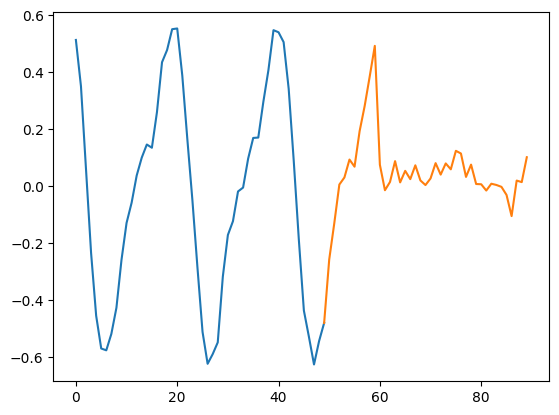

In [ ]:
plt.plot(x_new[:, :50,:][0])
plt.plot(range(49,90),x_new[:, 49:90,:][0])


In [213]:
series = np.sin(np.arange(1,100)).reshape(-1, 1)
x, y = series[:, :], series[:, :]

In [214]:
x.shape, y.shape

((99, 1), (99, 1))

In [219]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True,input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True,input_shape=[None, 1]),
    keras.layers.Dense(1)
])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss     =keras.losses.mse
)
model.fit(x, x, epochs=10, verbose=1)

Epoch 1/10
4/4 [==============================] - 2s 3ms/step - loss: 0.6063
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.4496
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.3198
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2199
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1407
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0820
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0021


In [220]:
pred = model.predict(x)

4/4 [==============================] - 0s 2ms/step


In [221]:
pred.shape

(99, 1, 1)

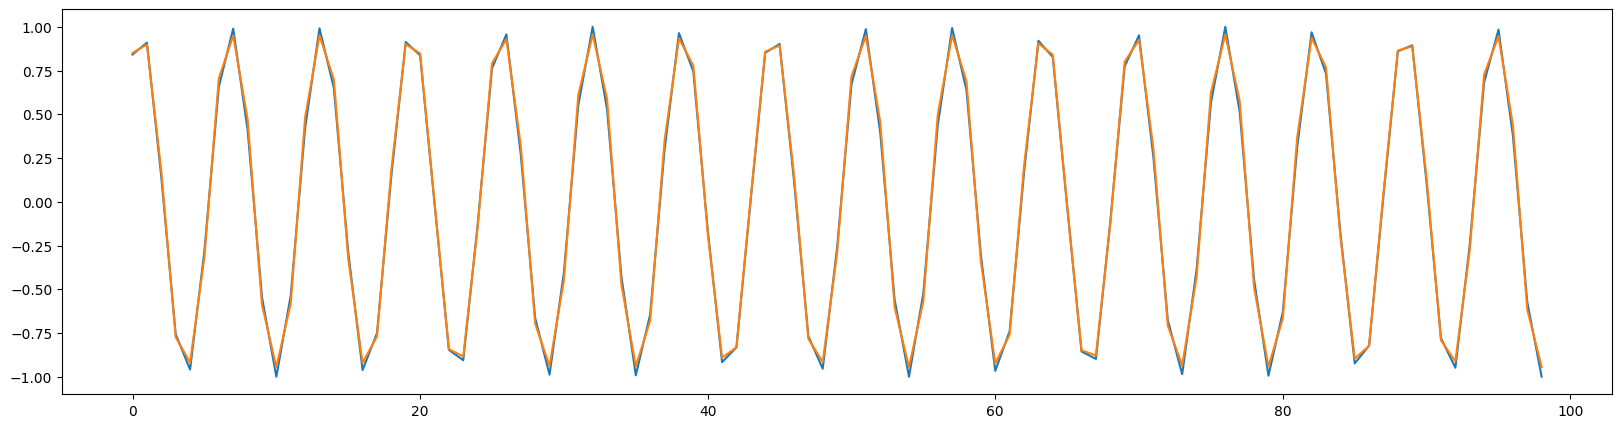

In [222]:
plt.figure(figsize=(20,5))
plt.plot(x)
plt.plot(pred[:,0])